# TheGraph data access
We plan to visualize and monitor the flow of delegated stake, total delegation pool and indexer allocation process. 

More research plan see [hackmd](https://hackmd.io/@Jiajia20/BkOoEZODd)

## visualization
- request GraphQL data API -> JSON -> PANDAS
- the current subgraph seemd only load the first 200 record (even if I specify first:1000)
- I'm able to load 200 at a time and combine them with 'first, skip' 

## To do
- [x]get specitialty subgraph
- [] double check pagination problem


In [3]:
#thanks to @Markus for the code and @Ford for the new subgraph

import json
import requests
url = 'https://api.thegraph.com/subgraphs/name/fordn/graph-network-events'

query = """query{
  stakeDelegateds (first:1000) {
    id
    blockNumber
    blockTime
    indexer
    delegator
    tokens
    shares
  }
}"""
r = requests.post(url, json = {'query':query})
p = json.loads(r.content)

#create pandas df
import pandas as pd
json_data = json.loads(r.text)
df_data = json_data['data']['stakeDelegateds']
df = pd.DataFrame(df_data)


In [4]:
df

,blockNumber,blockTime,delegator,id,indexer,shares,tokens
0,11877993,1613613525,0x1df0a5bfced8fb5b9eda72e6e500f44292792e76,0x00080339e26c2c83e9fb29023d01305fc97226b308ce...,0x5a8904be09625965d9aec4bffd30d853438a053e,3418633034608005764665,3535145450000000000000
1,11860879,1613385874,0x445ea1ccb8c2c984647484ca9bf0d08adafced60,0x000c11ff458217d9849370bef4fd156022b01e26f7d5...,0x4bc2e066fb0857493a1fbe48462bb34ff6ea731f,4975000000000000000000,4975000000000000000000
2,11673022,1610890634,0xf2e9fb0e1ffcdc0dca2f39aa2e2245375bccf3e5,0x000e23c35bc188a370f44082c5b8c6b0a1d074d4a2d2...,0xd22c1c1a1fc452e3312489f1e89676e93c3323f0,2477123641674834622479,2487500000000000000000
3,11508217,1608705474,0xad6ee7c40d7d80a6c404e82e77cde5c5088e98a5,0x000fbac2c251afe867e40bf1859c04d02fec5c65677e...,0x2c313e9fd1794685d2052af79457c858813b108f,497500000000000000000,497500000000000000000
4,11828097,1612951228,0x9af906c01f75154dd3402dfa441c7a4251c3201f,0x0011b573b9929af8022238e4bf2129ec3f18707b859b...,0x5a8904be09625965d9aec4bffd30d853438a053e,2219750089815380802995,2288500000000000000000
...,...,...,...,...,...,...,...
995,12088921,1616420260,0xa7a79b2b3a4d026ad08bcfa1fe0e0b20fd6ba867,0x161ab44140c26beb2199c0d4da3cd4883a16e50a8f4c...,0x5a8904be09625965d9aec4bffd30d853438a053e,79387911864166809951969,82916663350000000000000
996,11534383,1609052942,0x009f8003018cf789f758137f26c45ca13da1bfbe,0x161de1fb6e416083bf353d4629e2863c5649a6af46c6...,0x9238584c74e5fa445a8f72a4d4ef4699dd783852,1952580967229322915028,1990000000000000000000
997,11838345,1613086796,0x96978619e46439b9657ed3fcc07009c5aaa15074,0x161eb42b14544688fdddc90766d165246f27d63e3b8b...,0x9238584c74e5fa445a8f72a4d4ef4699dd783852,3813761348829677436346,3984774269167650000000
998,11778182,1612287204,0x69d299dc1c86a9ca2017c9640449bc0e67a1cd04,0x16326740444ca9f2f5e69539b3c9d0c83f2d53c305a2...,0xc60d0c8c74b5d3a33ed51c007ebae682490de261,622973475611695817161,646750000000000000000


In [13]:
df.sort_values('blockNumber')

,blockNumber,blockTime,delegator,id,indexer,shares,tokens
361,11474769,1608262679,0xb7797cb7b4a031c4c1e04ea14824fa5d8d30beed,0x07f058e4212ea4115857cd68ed38d6eba0a8fc84977c...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,39800000000000000000000,39800000000000000000000
730,11474819,1608263358,0x6c615cb1e310d0909698ef4992958d849bf4a45c,0x106191a769d4ba4690aeb8f366a1ffb00f500c03ecc6...,0x4fedde33607cfda2c82a999accb427d1170987d9,33167330000000000000000,33167330000000000000000
811,11475238,1608269302,0x7eb692f22af33d637aab31f9277653235682ebe6,0x11d12e4e40232247ba695bb303b0ea709873707de2cb...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,4002893379514657642500,4002893379514657642500
925,11476948,1608291242,0xcee87b725581b494b6b741105f8a4acba80082da,0x1478bd439a671285e34dbeacd9d907270719308ec162...,0x9238584c74e5fa445a8f72a4d4ef4699dd783852,7042604687446462930000,7042604687446462930000
525,11477184,1608294293,0x795f50722cf5ad82f78dda8dc8f7b235332977c3,0x0b6977f0cc00e06d12e273a8d66cc99f318096d2d1d3...,0x9238584c74e5fa445a8f72a4d4ef4699dd783852,37810000000000000000000,37810000000000000000000
...,...,...,...,...,...,...,...
302,12334662,1619690223,0xe65ca2abcd937b62a9963088edd7cade6f6a68eb,0x06cb91927b41c6e88735cf1aa3315dd78b924a99dbbc...,0x671bc7a0ffa02b0ee90ee03bcd11915df011503a,1887327294612540032692,2013482000000000000000
945,12340512,1619767586,0x5893ca468afbfe07fd3286870331e9029a138772,0x14e66e886380eb3bd46ad5635fb8b54a76122181ffaa...,0x5a8904be09625965d9aec4bffd30d853438a053e,912566823348290545773,963108969930545344886
472,12340517,1619767649,0x117eec859b7652680212c97aaa152a57344bd3c3,0x0a3a925c18ff48320ca882c075b5f890de3872f22335...,0x9238584c74e5fa445a8f72a4d4ef4699dd783852,15341655732642960641256,16417500000000000000000
93,12341683,1619783760,0x048eb4ee2c67d827cd0028273871bd934cb9d2a7,0x01ded6f7474d7a4bb6ef74a49ca67964d40eb69126fe...,0x9238584c74e5fa445a8f72a4d4ef4699dd783852,4461985749228221270431,4774885600000000000000


In [26]:
df2 = df[['blockNumber','blockTime']]
df2[df2.duplicated()]

,blockNumber,blockTime
203,11520282,1608866113
812,11727669,1611614660
949,11541660,1609148452


In [28]:
df.loc[[203, 812,949]]

,blockNumber,blockTime,delegator,id,indexer,shares,tokens
203,11520282,1608866113,0x9bddc9de55c563c0a9ca54488cd32f0787bc33d1,0x0487d50b46103d12c4a62c0bd727ba26098b26f59146...,0x5a8904be09625965d9aec4bffd30d853438a053e,1121342172687622654071,1125633550000000000000
812,11727669,1611614660,0x553663e10298bfd82af60b6783d12613d046378b,0x11d1d56b824b75a3ed1cc07c3c647284f4f17694b998...,0x19fbac0891042be71ce60321a17720358575f580,97895884853511504923251,155468750000000000000000
949,11541660,1609148452,0xc6f0934bd1f83ed7b6e07872debc85b399ea323d,0x151048868e70ef0717cc536dbd4d4e17f27ef56cd93b...,0xb06071394531b63b0bac78f27e12dc2beaa913e4,59341778263822479437,59700000000000000000


In [30]:
df[df.blockNumber == '11520282']

,blockNumber,blockTime,delegator,id,indexer,shares,tokens
100,11520282,1608866113,0x09ab720be0deda7f664e5dd15c5f33472da0e0fe,0x020bffe08db1d15a2f4761c64c985107744964aa3cb0...,0x5a8904be09625965d9aec4bffd30d853438a053e,14868099771335678571423,14925000000000000000000
203,11520282,1608866113,0x9bddc9de55c563c0a9ca54488cd32f0787bc33d1,0x0487d50b46103d12c4a62c0bd727ba26098b26f59146...,0x5a8904be09625965d9aec4bffd30d853438a053e,1121342172687622654071,1125633550000000000000


In [31]:
df[df.blockNumber == '11727669']

,blockNumber,blockTime,delegator,id,indexer,shares,tokens
421,11727669,1611614660,0x8b026623923e21045eada54f4b5b73064d5e9d1e,0x094e1c5e063bce046ade521a689c4df8143f524bcd12...,0xcb22a8ce581d04fef99b81ec5a60725070a3e8c4,99287660774724712284771,124374005000000000000000
812,11727669,1611614660,0x553663e10298bfd82af60b6783d12613d046378b,0x11d1d56b824b75a3ed1cc07c3c647284f4f17694b998...,0x19fbac0891042be71ce60321a17720358575f580,97895884853511504923251,155468750000000000000000


In [ ]:
df[df.blockNumber == '11727669']

In [33]:
df.delegator.nunique()

915

In [16]:
type(df.blockNumber[0])

str

In [19]:
df.id.nunique()

1000

In [14]:
df.blockNumber.plot()

TypeError: no numeric data to plot

In [ ]:

url = 'https://api.thegraph.com/subgraphs/name/fordn/graph-network-events'

query = """query{
  stakeDelegateds (first:1000) {
    id
    blockNumber
    blockTime
    indexer
    delegator
    tokens
    shares
  }
}"""
r = requests.post(url, json = {'query':query})
p = json.loads(r.content)

#create pandas df
import pandas as pd
json_data = json.loads(r.text)
df_data = json_data['data']['stakeDelegateds']
df = pd.DataFrame(df_data)

In [46]:
url = 
r = requests.post(url, json={'query': query})
print(r.status_code)
print(r.text)

200
{"data":{"delegatedStakes":[{"delegator":{"id":"0x0b010b0152ae2bb7b251c7ebd7d2173db9141ee2"},"id":"0x0b010b0152ae2bb7b251c7ebd7d2173db9141ee2-0xe7a694696a4d11ac0b7ab2dcb99a7fcf200eb00b","indexer":{"id":"0xe7a694696a4d11ac0b7ab2dcb99a7fcf200eb00b"}},{"delegator":{"id":"0x0b075304b97be0b3731be4c7e2de69fdccf84f49"},"id":"0x0b075304b97be0b3731be4c7e2de69fdccf84f49-0xb06071394531b63b0bac78f27e12dc2beaa913e4","indexer":{"id":"0xb06071394531b63b0bac78f27e12dc2beaa913e4"}},{"delegator":{"id":"0x0b1362a611cc2465d1a28ee71b0bea879c38d3ef"},"id":"0x0b1362a611cc2465d1a28ee71b0bea879c38d3ef-0x19fbac0891042be71ce60321a17720358575f580","indexer":{"id":"0x19fbac0891042be71ce60321a17720358575f580"}},{"delegator":{"id":"0x0b2434b87ddcba31975aaa66c57054e5fd11954f"},"id":"0x0b2434b87ddcba31975aaa66c57054e5fd11954f-0x4d6a8776a164776c93618233a0003e8894e7e6c2","indexer":{"id":"0x4d6a8776a164776c93618233a0003e8894e7e6c2"}},{"delegator":{"id":"0x0b2434b87ddcba31975aaa66c57054e5fd11954f"},"id":"0x0b2434b87dd

In [47]:
len(df)

200

## This is what we want it to look like

In [2]:
subgraph_tvl.head()

,id,liquidity
0,0x002d3737e074fb4521036f2c41beba05d221ba69,0
1,0x003a70265a3662342010823bea15dc84c6f7ed54,1636016.131248165544539920705867876
2,0x004e74ff81239c8f2ec0e2815defb970f3754d86,680.928486911431236447041487663722
3,0x0077732357ac0f29e26ea629b79ab3b266ddb796,0.8653140420464888814426818591183125
4,0x0092b2d25d76d84d27b999fe93d5e1c70511cd2b,8.41728837682050716701128507145078


Dealing with pagination here is a pain and the `query` string above does not actually run in the explorer as written. In order to make it easier to move back and forth between the [explorer](https://thegraph.com/explorer/subgraph/balancer-labs/balancer) and the python environment we should build a function to run the same query we use in the explorer, for example:
```
{pools(first:1000){
        id
        liquidity
    }
}
```



In [3]:
def query_theGraph(raw_query, field_name, url, verbose=False, hardcap=5000):

    query_parts =raw_query.split(')')
    paginator = ", skip:{}"
    #this expectes the raw query to gave a `first:1000` term
    n = 0
    records = []
    while True:
        print(f'request {n+1}')
        skipper = paginator.format(n*1000)
        query = 'query '+query_parts[0]+skipper+')'+query_parts[1]

        if verbose:
            print(query)

        r = requests.post(url, json = {'query':query})

        try:
            d = json.loads(r.content)['data'][field_name]
        except:
            #print(r.content)
            errors = json.loads(r.content)['errors']
            #print(errors)
            for e in errors:
                print(e['message'])

        print(f'results {len(d)}')
        records.extend(d)
        print(f'total {len(records)}')
        
        if n*1000>hardcap:
            break
        
        n += 1
        if len(d) < 1000:
            break
        
    return pd.DataFrame(records)

In [5]:
raw_query = '''{pools(first:1000){
        id
        liquidity
    }
}

'''
field_name = 'pools'

subgraph_tvl2 = query_theGraph(raw_query, field_name, url, True)

request 1
query {pools(first:1000, skip:0){
        id
        liquidity
    }
}


results 1000
total 1000
request 2
query {pools(first:1000, skip:1000){
        id
        liquidity
    }
}


results 1000
total 2000
request 3
query {pools(first:1000, skip:2000){
        id
        liquidity
    }
}


results 970
total 2970


In [6]:
subgraph_tvl2

,id,liquidity
0,0x002d3737e074fb4521036f2c41beba05d221ba69,0
1,0x003a70265a3662342010823bea15dc84c6f7ed54,1636016.131248165544539920705867876
2,0x004e74ff81239c8f2ec0e2815defb970f3754d86,680.928486911431236447041487663722
3,0x0077732357ac0f29e26ea629b79ab3b266ddb796,0.8653140420464888814426818591183125
4,0x0092b2d25d76d84d27b999fe93d5e1c70511cd2b,8.41728837682050716701128507145078
...,...,...
2965,0xffe8c31fb0ab62c99fc6e8c724d0f1949dbaa44f,3572.462460721094077974957122699913
2966,0xfff293e1f6c174867f23351c1510833c8087fecb,0
2967,0xfff29c8bce4fbe8702e9fa16e0e6c551f364f420,0
2968,0xfff2a5f81d14729408201341df42af29f3b30458,5683779.97610631293447295169998365


In [7]:
subgraph_tvl2.head()

,id,liquidity
0,0x002d3737e074fb4521036f2c41beba05d221ba69,0
1,0x003a70265a3662342010823bea15dc84c6f7ed54,1636016.131248165544539920705867876
2,0x004e74ff81239c8f2ec0e2815defb970f3754d86,680.928486911431236447041487663722
3,0x0077732357ac0f29e26ea629b79ab3b266ddb796,0.8653140420464888814426818591183125
4,0x0092b2d25d76d84d27b999fe93d5e1c70511cd2b,8.41728837682050716701128507145078


In [8]:
subgraph_tvl2.columns = ['id','liquidity2'] 

In [9]:
checker = subgraph_tvl.merge(subgraph_tvl2)

In [10]:
checker['matches'] = checker.liquidity==checker.liquidity2

In [11]:
checker.matches.describe()

count     2970
unique       1
top       True
freq      2970
Name: matches, dtype: object

Now that have checked the data we can proceed with some exploratory analysis.

In [12]:
subgraph_tvl.liquidity= subgraph_tvl.liquidity.apply(float)

In [13]:
subgraph_tvl.sort_values('liquidity', inplace=True)

In [14]:
subgraph_tvl.liquidity

0       0.000000e+00
1722    0.000000e+00
1721    0.000000e+00
1720    0.000000e+00
1718    0.000000e+00
            ...     
1078    6.912330e+07
1623    8.150338e+07
1058    2.666558e+08
2291    3.220365e+08
366     3.499860e+08
Name: liquidity, Length: 2970, dtype: float64

In [15]:
plt_df=subgraph_tvl[subgraph_tvl.liquidity>1].copy().sort_values('liquidity', ascending=False)

In [16]:
subgraph_tvl.describe()

,liquidity
count,2.970000e+03
mean,6.972006e+05
std,1.050774e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,5.651683e+02
max,3.499860e+08


In [17]:
plt_df.tail()

,id,liquidity
340,0x1d261ec7ab834fedb01602c5b7ffc6fc68362bbf,1.577654
986,0x53f160490d7e48ba2c31be4790f3d87a2f4dc662,1.371422
1849,0x9e4a4b53e19410ae519be74f92659e5b0ef9489b,1.330313
2354,0xcb8ec8236aff8e112517f4e9a9ffb413a237e6b7,1.153105
1296,0x6d42692518c8b09c883e7c1e69c97518107f2185,1.030083


/Users/zargham/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5'),
  Text(200.0, 0, '0xdd0b69d938c6e98bf8f16f04c4913a0c07e0bb6e'),
  Text(400.0, 0, '0x76958fa640ca66e8f4337a0d874b2d8a6c408f95'),
  Text(600.0, 0, '0xed3d99d838ab16e8a0543bb91f254139a0fcb8dd'),
  Text(800.0, 0, '0x60332a3263722c380ba8c0a42ff69d8e45498692'),
  Text(1000.0, 0, '0xd58eef5b3741919d62d68c14958d0418166edb2b'),
  Text(1200.0, 0, '')])

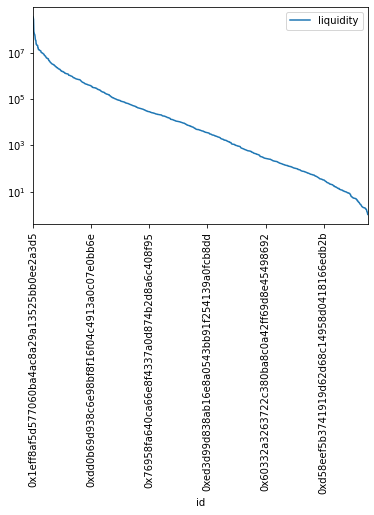

In [18]:
plt_df.plot(x='id', y='liquidity', logy=True)
plt.xticks(rotation=90)

In [19]:
plt_df['cumulative liquidity'] = plt_df.liquidity.cumsum()

/Users/zargham/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0x1eff8af5d577060ba4ac8a29a13525bb0ee2a3d5'),
  Text(200.0, 0, '0xdd0b69d938c6e98bf8f16f04c4913a0c07e0bb6e'),
  Text(400.0, 0, '0x76958fa640ca66e8f4337a0d874b2d8a6c408f95'),
  Text(600.0, 0, '0xed3d99d838ab16e8a0543bb91f254139a0fcb8dd'),
  Text(800.0, 0, '0x60332a3263722c380ba8c0a42ff69d8e45498692'),
  Text(1000.0, 0, '0xd58eef5b3741919d62d68c14958d0418166edb2b'),
  Text(1200.0, 0, '')])

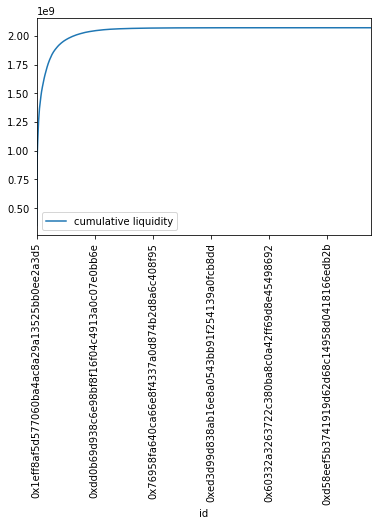

In [20]:
plt_df.plot(x='id', y='cumulative liquidity', logy=False)
plt.xticks(rotation=90)